In [1]:
import numpy as np
import pandas as pd
import nltk

In [3]:
sms=pd.read_csv('spam.csv')
sms.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms=sms.rename(columns={"Category":"label","Message":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print(" no of rows", len(sms))

 no of rows 5572


In [7]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
sms.describe()

,label,text
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


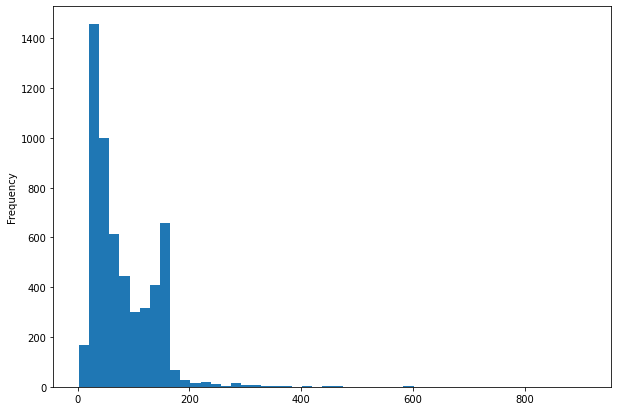

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50, kind='hist',figsize=(10,7))

In [11]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['To get 2.50 pounds free call credit and details of great offers pls reply 2 this text' ]
text=count.fit_transform(sms['text'],input)

X_train, X_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1)

text

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [54]:
print(X_train.shape)
print(X_test.shape)
input=text[5571]

(4457, 8709)
(1115, 8709)


In [30]:
prediction=model.predict(X_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9883408071748879
Precision score: 0.9527027027027027
Recall score: 0.9591836734693877
F1 score: 0.9559322033898305


In [55]:
input

<1x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [52]:
model.predict(input)

array([0])

In [71]:
data=sms['text']
input="To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"

In [72]:
data.loc[len(data.index)]="To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"

In [73]:
text=count.fit_transform(data)

In [74]:
text

<5573x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74114 stored elements in Compressed Sparse Row format>

In [75]:
input=text[5572]

In [76]:
model.predict(input)

array([1])